<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Neural Networks with Keras

_Authors: Justin Pounders (ATL) and Riley Dallas (ATX)_

---


### Learning Objectives

- Describe the basic `keras` workflow.
- Train regression and classification neural networks using `keras`

In [1]:
import numpy as np
from sklearn.datasets import make_classification, make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# Regression
---

`make_regression` is an excellent library for generating a random regression problem. This helps us focus on the model without having to worry about the dataset. 

In the cell below, use `make_regression` to generate 10,000 samples using 20 features.

In [2]:
X, y = make_regression(n_samples=10000, n_features=20, random_state=42)

### Train/Test Split
---

We always want to have a validation set to test our model. Use the `train_test_split` function to split our `X` and `y` variables into a training set and a holdout set.

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### `StandardScaler`
---

You want to scale your data for *any* model that uses Gradient Descent, which includes Neural Networks.

In [4]:
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

### Your first Neural Network!!
---

Creating a model in `keras` entails a few steps:
1. Create your network architecture
2. Compile your model
3. Fit your model

We'll cover each step in the cells below.

### Create your network architecture
---

We'll create a simple network with:
- an input layer
- one hidden layer. As a general rule, you should use `'relu'` as your activation function for all hidden layers.
- an output layer. 

For *all* regression problems, your output layer will be 1 neuron with *no* activation function. 

In [5]:
model = Sequential() # Sequential pipeline
model.add(Dense(32, # How many nodes/neurons do you want in your first layer.
                input_shape=(20,),
                activation='relu'))
model.add(Dense(1))

In [6]:
# 20 input columns + 1 bias term
# 32 nodes on the first hidden layer
21*32

672

In [7]:
# Check if your model architecture was built correctly
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                672       
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 705
Trainable params: 705
Non-trainable params: 0
_________________________________________________________________


### Compile your model
---

Whenever you compile your model, you have to specify a few things: 
1. What [loss function](https://keras.io/losses/) to use (depends on if it's regression, classification, etc)
2. What optimizer to use (Adam gives good results on most cases)
3. Optional: What additional [metrics](https://keras.io/metrics/) you'd like to monitor

In [15]:
opt = Adam(learning_rate=0.01)
model.compile(loss='mse', optimizer=opt, metrics=['mae'])

### Fit your model
---

When fitting your model, you need to specify a few things:
1. The number of epochs: start with 10. Always easy to add more
2. Your batch size: pick a number that is a power of 2
3. Your validation data, which in this case is our test set.

In [16]:
history = model.fit(X_train_sc, y_train, validation_data=(X_test_sc, y_test), epochs=10, batch_size=512)

Epoch 1/10
15/15 [==============================] - 0s 12ms/step - loss: 33841.1836 - mae: 146.6901 - val_loss: 31126.9961 - val_mae: 140.6022
Epoch 2/10
15/15 [==============================] - 0s 5ms/step - loss: 30071.7891 - mae: 137.7596 - val_loss: 26980.1992 - val_mae: 130.3946
Epoch 3/10
15/15 [==============================] - 0s 5ms/step - loss: 25698.0527 - mae: 126.5830 - val_loss: 22300.5586 - val_mae: 117.8792
Epoch 4/10
15/15 [==============================] - 0s 5ms/step - loss: 20857.8242 - mae: 113.2434 - val_loss: 17469.8164 - val_mae: 103.4732
Epoch 5/10
15/15 [==============================] - 0s 8ms/step - loss: 16101.5918 - mae: 98.4595 - val_loss: 12890.5410 - val_mae: 87.8420
Epoch 6/10
15/15 [==============================] - 0s 6ms/step - loss: 11739.6377 - mae: 82.7769 - val_loss: 8965.3486 - val_mae: 72.2993
Epoch 7/10
15/15 [==============================] - 0s 8ms/step - loss: 8051.3345 - mae: 67.3131 - val_loss: 5911.5117 - val_mae: 57.5948
Epoch 8/10
15/

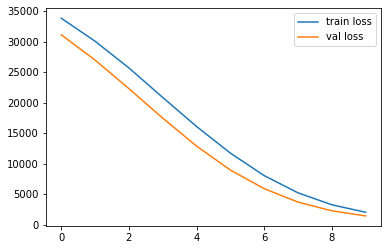

In [17]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

### Model predictions
---

Your `keras` model has a `.fit()` method, similar to `sklearn`. The only difference is `keras` returns a 2D `numpy` matrix (`sklearn` returns a 1D `numpy` array).

Try it out in the cell below.

In [19]:
model.predict(X_test_sc)

array([[  98.8928 ],
       [ 130.72879],
       [ 314.1093 ],
       ...,
       [ 213.71329],
       [ 163.38731],
       [-217.24916]], dtype=float32)

# Binary Classification
---

`make_classification` is similar to `make_regression`, except now we're predicting a class (0 or 1).

In the cell below, use `make_classification` to generate 10,000 samples using 20 features.

In [23]:
X, y = make_classification(n_samples=10_000, n_features=20, random_state=42)

### Train/Test Split
---

We always want to have a validation set to test our model. Use the `train_test_split` function to split our `X` and `y` variables into a training set and a holdout set.

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

### `StandardScaler`
---

You want to scale your data for *any* model that uses Gradient Descent, which includes Neural Networks.

In [25]:
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

### Network Architecture for Binary Classification
---

We'll create a simple network with:
- an input layer, 
- one hidden layer. As a general rule, you should use `'relu'` as your activation function for all hidden layers.
- an output layer. 

For *all* binary classification problems, your output layer will be 1 neuron with `'sigmoid'` activation function. Sigmoid squashes the output of our neuron to a value between 0 and 1, which is great for predicting probabilities. We'll use the probability for our loss function in the next step.

In [26]:
model = Sequential()
model.add(Dense(32,
                input_shape=(20,),
                activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [27]:
# Check if your model architecture was built correctly
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 32)                672       
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 705
Trainable params: 705
Non-trainable params: 0
_________________________________________________________________


### Compile your model
---

Whenever you compile your model, you have to specify a few things: 
1. What loss function to use: For binary classification, use `binary_crossentropy`. ([Description](https://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html#cross-entropy))
2. What optimizer to use (Adam gives good results on most cases)
3. Optional: What additional [metrics](https://keras.io/metrics/) you'd like to monitor

In [28]:
opt = Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

### Fit your model
---

When fitting your model, you need to specify a few things:
1. The number of epochs: start with 10. Always easy to add more
2. Your batch size: pick a number that is a power of 2
3. Your validation data, which in this case is our test set.

When you fit a model, `keras` returns a `History` object. We need that in the next step, but for now, just save it to a variable.

In [29]:
history = model.fit(X_train_sc, y_train, validation_data=(X_test_sc, y_test), epochs=30, batch_size=512)

Epoch 1/30
15/15 [==============================] - 1s 12ms/step - loss: 0.7631 - accuracy: 0.4899 - val_loss: 0.7273 - val_accuracy: 0.5232
Epoch 2/30
15/15 [==============================] - 0s 5ms/step - loss: 0.6805 - accuracy: 0.5769 - val_loss: 0.6512 - val_accuracy: 0.6196
Epoch 3/30
15/15 [==============================] - 0s 3ms/step - loss: 0.6126 - accuracy: 0.6720 - val_loss: 0.5893 - val_accuracy: 0.7080
Epoch 4/30
15/15 [==============================] - 0s 4ms/step - loss: 0.5576 - accuracy: 0.7532 - val_loss: 0.5386 - val_accuracy: 0.7856
Epoch 5/30
15/15 [==============================] - 0s 4ms/step - loss: 0.5122 - accuracy: 0.8076 - val_loss: 0.4965 - val_accuracy: 0.8240
Epoch 6/30
15/15 [==============================] - 0s 6ms/step - loss: 0.4743 - accuracy: 0.8420 - val_loss: 0.4613 - val_accuracy: 0.8456
Epoch 7/30
15/15 [==============================] - 0s 4ms/step - loss: 0.4422 - accuracy: 0.8597 - val_loss: 0.4317 - val_accuracy: 0.8552
Epoch 8/30
15/15 [=

### Visualizing model training
---

Whenever you fit your `keras` model, it returns a `History` object ([link](https://keras.io/visualization/#training-history-visualization)) that can be used for plotting.

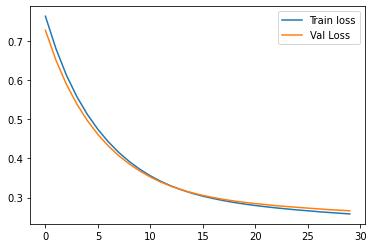

In [30]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend();

### Challenge
---

Using the `history` object, plot the model's accuracy (for both train and test).

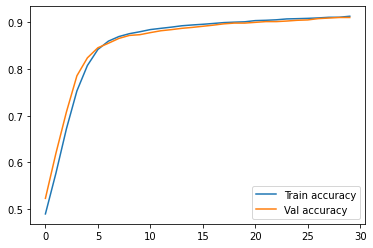

In [31]:
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Val accuracy')
plt.legend();

# Multi-class Classification
---

The `make_classification` function allows for multi-class problems as well. Simply increase the `n_classes` and voila!

**NOTE**: You'll need to increase `n_informative` as you increase `n_classes`.

In the cell below, let's create a dataset with three classes.

In [32]:
X, y = make_classification(n_samples=10000, n_features=20, n_informative=4, n_classes=3)

### One-hot Encoding Targets
---

In `keras`, you have to one-hot encode your `y` if it contains more than two classes. We'll use `keras`' built-in `to_categorical` function to achieve this.

In [33]:
y = to_categorical(y)
y[:5]

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]], dtype=float32)

### Train/Test Split
---

We always want to have a holdout set to test our model. Use the `train_test_split` function to split our `X` and `y` variables into a training set and a holdout set.

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### `StandardScaler`
---

Use an instance of `StandardScaler` to scale your `X_train` and `X_test` in the cell below.

In [35]:
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

### Network Architecture for Multi-class Classification
---

We'll create a simple network with:
- an input layer
- one hidden layer. As a general rule, you should use `'relu'` as your activation function for all hidden layers.
- an output layer

For *all* multi-class classification problems, your output layer will be the same number of neurons as the number of classes in your problem. The activation function will be `softmax`, which will normalize the predictions into probabilities that sum up to 1.0.

In [36]:
model = Sequential()
model.add(Dense(32, 
                input_shape=(20,),
                activation='relu'))
model.add(Dense(3, activation='softmax'))

In [37]:
# Check if your model architecture was built correctly
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                672       
                                                                 
 dense_5 (Dense)             (None, 3)                 99        
                                                                 
Total params: 771
Trainable params: 771
Non-trainable params: 0
_________________________________________________________________


### Compile your model
---

Whenever you compile your model, you have to specify a few things: 
1. What loss function to use: For multi-class classification, use `categorical_crossentropy`. ([Description](https://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html#cross-entropy))
2. What optimizer to use (Always use `'adam'`)
3. Optional: What additional [metrics](https://keras.io/metrics/) you'd like to monitor

In [38]:
opt = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

### Fit your model
---

When fitting your model, you need to specify a few things:
1. The number of epochs: start with 10. Always easy to add more
2. Your batch size: pick a number that is a power of 2
3. Your validation data, which in this case is our test set.

In [39]:
history = model.fit(X_train_sc, y_train, validation_data=(X_test_sc, y_test), epochs=10, batch_size=512)

Epoch 1/10
15/15 [==============================] - 1s 19ms/step - loss: 1.3878 - accuracy: 0.2944 - val_loss: 1.2723 - val_accuracy: 0.3144
Epoch 2/10
15/15 [==============================] - 0s 4ms/step - loss: 1.2026 - accuracy: 0.3476 - val_loss: 1.1203 - val_accuracy: 0.3892
Epoch 3/10
15/15 [==============================] - 0s 5ms/step - loss: 1.0768 - accuracy: 0.4329 - val_loss: 1.0195 - val_accuracy: 0.4864
Epoch 4/10
15/15 [==============================] - 0s 4ms/step - loss: 0.9929 - accuracy: 0.5148 - val_loss: 0.9484 - val_accuracy: 0.5644
Epoch 5/10
15/15 [==============================] - 0s 5ms/step - loss: 0.9315 - accuracy: 0.5825 - val_loss: 0.8952 - val_accuracy: 0.6176
Epoch 6/10
15/15 [==============================] - 0s 5ms/step - loss: 0.8836 - accuracy: 0.6265 - val_loss: 0.8533 - val_accuracy: 0.6580
Epoch 7/10
15/15 [==============================] - 0s 6ms/step - loss: 0.8444 - accuracy: 0.6619 - val_loss: 0.8187 - val_accuracy: 0.6892
Epoch 8/10
15/15 [=

### Visualizing model training
---

Whenever you fit your `keras` model, it returns a `History` object ([link](https://keras.io/visualization/#training-history-visualization)) that can be used for plotting.

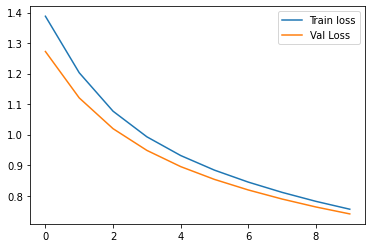

In [40]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend();

### Challenge
---

Using the `history` object, plot the model's accuracy (for both train and test).

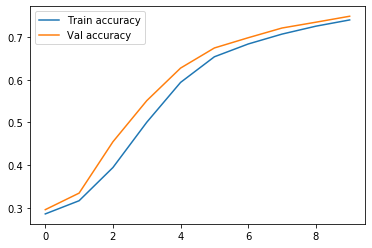

In [28]:
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Val accuracy')
plt.legend();

# Conclusion
We saw how to construct simple Neural Networks for:
1. Regression 
1. Binary Classification
1. Multi Class Classification